In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from tqdm import tqdm
import sympy as sym

In [2]:
def sign(x):
    
    if x < 0:
        return -1.
    elif x == 0:
        return 0.
    else:
        return 1.

In [3]:
sign = np.vectorize(sign)

In [4]:
_x = np.linspace(-1,1,101)
_y = sign(_x)

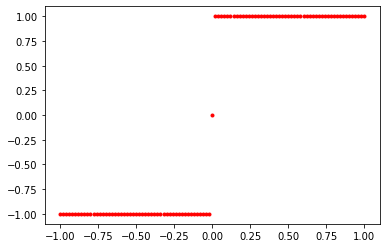

In [5]:
plt.scatter(_x,_y,color='r',marker='.')

In [6]:
x = sym.Symbol('x',Real=True)
y = sym.Symbol('y',Real=True)
xi, wi = np.polynomial.legendre.leggauss(15)
#puntos de gauss

In [7]:
def GetLegendre(n):
    
    y = (x**2 - 1)**n
    
    p = sym.diff(y,x,n)/(2**n * np.math.factorial(n))
    
    return p

In [8]:
N = 20
Legendre = []

for i in range(N):
    Legendre.append(GetLegendre(i))

In [9]:
def Pn(Legendre):
    pn = sym.lambdify([x],Legendre,'numpy')
    return pn

In [10]:
def GetCoefficient(n,f,Legendre):
    
    cn = 1.0
    
    cn *= np.sum( wi*f(xi)*Pn(Legendre)(xi))
    cn *= (2*n+1)/2.
    
    return cn

In [11]:
cn = np.zeros(N)

for i in range(N):
    cn[i] = GetCoefficient(i,sign,Legendre[i])
    
cn

array([ 6.93889390e-17,  1.48971231e+00,  1.73472348e-17, -8.38742583e-01,
        3.12250226e-17,  6.15369232e-01, -6.76542156e-17, -4.68994560e-01,
       -2.94902991e-17,  3.48540946e-01, -1.82145965e-17, -2.36219080e-01,
       -2.16840434e-17,  1.22517145e-01,  0.00000000e+00, -1.84201441e-17,
        7.15573434e-17, -1.39529963e-01, -1.60461922e-17,  3.07786739e-01])

In [12]:
_yapprox = np.zeros_like(_x)

for i in tqdm(range(len(_yapprox))):
    
    sum_ = 0.
    for j in range(N):
        sum_ += cn[j]*Pn(Legendre[j])(_x[i])
    
    _yapprox[i] = sum_

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [00:08<00:00, 12.27it/s]


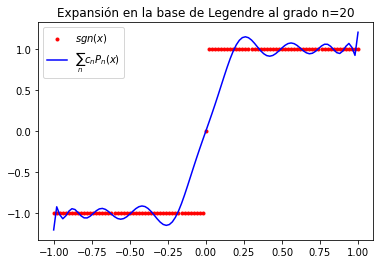

In [13]:
plt.title('Expansión en la base de Legendre al grado n={}'.format(N))
plt.scatter(_x,_y,color='r',marker='.',label=r'$sgn(x)$')
plt.plot(_x,_yapprox,color='b',label=r'$\sum_{n} c_{n}P_{n}(x)$')
plt.legend()
#plt.savefig('LegendreAprox.pdf')